In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad')
adata

AnnData object with n_obs × n_vars = 19463 × 2763
    obs: 'cell_type', 'marker_ct'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [4]:
gex_df = adata.to_df(layer='normalized_count')
ccr4 = gex_df['Ccr4']
prdm1 = gex_df['Prdm1']
gata3 = gex_df['Gata3']

In [5]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../../src')

In [6]:
from spaceoracle.tools.network import RegulatoryFactory
co_grn = RegulatoryFactory(
    colinks_path='/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD_colinks.pkl',
    annot='cell_type_int'
)

2025-05-20 11:49:53.989939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

In [7]:
all_genes = adata.var_names
len(all_genes)

2763

In [8]:
# oops incomplete filtering 

adata = adata[:, ~adata.var_names.str.contains('Rik')]
adata = adata[:, ~adata.var_names.str.contains('rik')]
adata = adata[:, ~adata.var_names.str.contains(r'^Hb\w+-\w+$')]
adata = adata[:, ~adata.var_names.str.contains('Hp')]
adata = adata[:, ~adata.var_names.str.startswith('Rp')]
adata = adata[:, ~adata.var_names.str.startswith('n-r5s')]
adata = adata[:, ~adata.var_names.str.startswith('n-r5')]
adata = adata[:, ~adata.var_names.str.startswith('N-r5s')]
adata = adata[:, ~adata.var_names.str.startswith('N-r5')]
adata = adata[:, ~adata.var_names.str.startswith('n-R5s')]
adata = adata[:, ~adata.var_names.str.startswith('n-R5')]
adata = adata[:, ~adata.var_names.str.startswith('N-R5s')]
adata = adata[:, ~adata.var_names.str.startswith('N-R5')]
adata = adata[:, ~adata.var_names.str.startswith('Aa')]
adata = adata[:, ~adata.var_names.str.startswith('Ab')]
adata = adata[:, ~adata.var_names.str.startswith('Ac')]
adata = adata[:, ~adata.var_names.str.startswith('Gm')]
adata = adata[:, ~adata.var_names.str.startswith('Mir')]
adata = adata[:, adata.var.index.str.len() > 1]
adata

View of AnnData object with n_obs × n_vars = 19463 × 2720
    obs: 'cell_type', 'marker_ct'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [16]:
np.any(adata.uns['received_ligands_tfl'].columns) in set(all_genes) - set(adata.var_names)

False

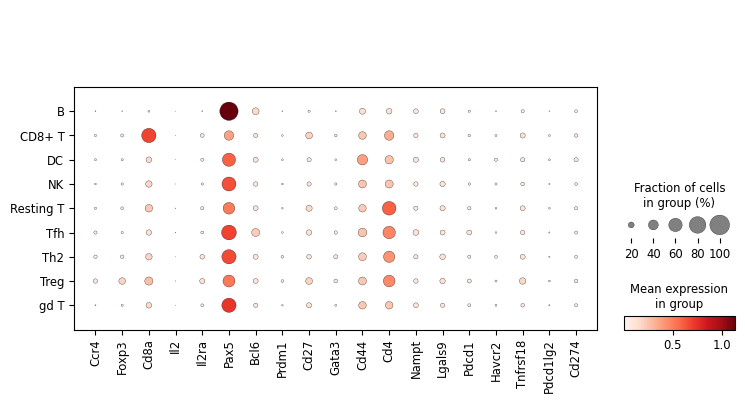

In [20]:
var_names = ['Ccr4', 'Foxp3', 'Cd8a', 'Il2', 'Il2ra', 'Pax5', 'Bcl6', 
    'Prdm1', 'Cd27', 'Gata3', 'Cd44', 'Cd4', 'Nampt', 'Lgals9', 'Pdcd1', 
    'Havcr2', 'Tnfrsf18', 'Pdcd1lg2', 'Cd274']
    
sc.pl.dotplot(adata, 
    var_names=var_names, swap_axes=False,
    groupby='cell_type')

In [ ]:
from spaceoracle.tools.network import encode_labels


In [17]:
adata.write_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad')

In [18]:
from spaceoracle.models.parallel_estimators import SpatialCellularProgramsEstimator

estimator = SpatialCellularProgramsEstimator(
    adata, 
    target_gene='Cd74', 
    cluster_annot='cell_type_int',
    radius=400, 
    contact_distance=50,
    grn=co_grn,
)

AssertionError: cluster_annot must be in adata.obs.columns

In [ ]:
estimator.lr

,ligand,receptor,pathway,signaling,radius,pairs
0,Tgfb1,Tgfbr1,TGFb,Secreted Signaling,400,Tgfb1$Tgfbr1
0,Tgfb1,Tgfbr2,TGFb,Secreted Signaling,400,Tgfb1$Tgfbr2
3,Tgfb1,Acvr1b,TGFb,Secreted Signaling,400,Tgfb1$Acvr1b
4,Tgfb1,Acvr1c,TGFb,Secreted Signaling,400,Tgfb1$Acvr1c
12,Bmp2,Acvr2a,BMP,Secreted Signaling,400,Bmp2$Acvr2a
...,...,...,...,...,...,...
2012,Thy1,Itgb3,THY1,Cell-Cell Contact,50,Thy1$Itgb3
2015,Itga4,Vcam1,VCAM,Cell-Cell Contact,50,Itga4$Vcam1
2015,Itgb1,Vcam1,VCAM,Cell-Cell Contact,50,Itgb1$Vcam1
2016,Itga9,Vcam1,VCAM,Cell-Cell Contact,50,Itga9$Vcam1


In [ ]:
estimator.fit(num_epochs=100, learning_rate=5e-3, 
    score_threshold=0.2, l1_reg=1e-9, estimator='lasso')

Fitting Cd74 with 520 modulators
	64 Transcription Factors
	323 Ligand-Receptor Pairs
	133 TranscriptionFactor-Ligand Pairs
0: 0.7292 | 0.7171
1: 0.9456 | 0.9419
2: 0.9632 | 0.9608
3: 0.9742 | 0.9742
4: 0.9456 | 0.9417
5: 0.9575 | 0.9542
6: 0.9355 | 0.9285
7: 0.9721 | 0.9705
8: 0.9766 | 0.9758


In [ ]:
base_dir = '/ix/djishnu/shared/djishnu_kor11/'
from spaceoracle import SpaceTravLR

star = SpaceTravLR(
    adata=adata,
    annot='cell_type_int', 
    max_epochs=100, 
    learning_rate=5e-3, 
    spatial_dim=64,
    batch_size=512,
    grn=co_grn,
    radius=400,
    contact_distance=50,
    save_dir=base_dir + 'lasso_runs/mouse_lymph3_visiumHD_subsampled'
)

star.run()